### Pandas package

#### Motivation

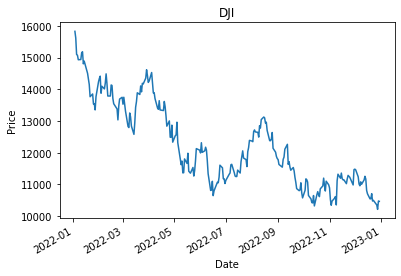

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
dow = pd.read_csv("data/dji.csv", index_col=0, parse_dates=True)

close = dow["Close"]
close.plot(ax=ax)

ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("DJI")

fig.savefig("data/dji.pdf", format="pdf")

### Series

In [5]:
# String representation of a Series

## 0 3
## 1 7
## 2 -8
## 3 4
## 4 26
## dtype: int64

#### Create Series

In [6]:
# Importing Pandas and creating a Series

import numpy as np
import pandas as pd

obj = pd.Series([2, -5, 9, 4])
obj

## 0 2
## 1 -5
## 2 9
## 3 4
## dtype: int64

0    2
1   -5
2    9
3    4
dtype: int64

In [7]:
# Series indexing vs. Numpy indexing

obj2 = pd.Series([2, -5, 9, 4], index=["a", "b", "c", "d"])
npobj = np.array([2, -5, 9, 4])

obj2
## a 2
## b -5
## c 9
## d 4
## dtype: int64

obj2["b"]
## -5

npobj[1]
## -5

-5

In [8]:
# Series creation from Numpy arrays

npobj = np.array([2, -5, 9, 4])
obj2 = pd.Series(npobj, index=["a", "b", "c", "d"])

obj2
## a 2
## b -5
## c 9
## d 4
## dtype: int64# 

a    2
b   -5
c    9
d    4
dtype: int32

In [9]:
# Series from dicts

dictdata = {"Göttingen": 117665, "Northeim": 28920,
            "Hannover": 532163, "Berlin": 3574830}

obj3 = pd.Series(dictdata)

obj3
## Göttingen 117665
## Northeim 28920
## Hannover 532163
## Berlin 3574830
## dtype: int64

Göttingen     117665
Northeim       28920
Hannover      532163
Berlin       3574830
dtype: int64

In [10]:
# Dict to Series with manual index

cities = ["Hamburg", "Göttingen", "Berlin", "Hannover"]
obj4 = pd.Series(dictdata, index=cities)

obj4
## Hamburg NaN
## Göttingen 117665.0
## Berlin 3574830.0
## Hannover 532163.0
## dtype: float64

Hamburg            NaN
Göttingen     117665.0
Berlin       3574830.0
Hannover      532163.0
dtype: float64

#### Series properties

In [11]:
# Series properties

obj.values
## array([ 2, -5, 9, 4])

obj.index
## RangeIndex(start=0, stop=4, step=1)

obj2.index
## Index(['a', 'b', 'c', 'd'], dtype='object')

Index(['a', 'b', 'c', 'd'], dtype='object')

#### Selecting and manipulating values

In [12]:
# Series manipulation

obj2[["c", "d", "a"]]
## c 9
## d 4
## a 2
## dtype: int64

obj2[obj2 < 0]
## b -5
## dtype: int64

b   -5
dtype: int32

In [13]:
# Series functions

obj2 * 2
## a 4
## b -10
## c 18
## d 8
## dtype: int64

np.exp(obj2)["a":"c"]
## a 7.389056
## b 0.006738
## c 8103.083928
## dtype: float64

"c" in obj2
## True

True

In [14]:
# Series manipulation

obj4["Hamburg"] = 1900000

obj4
## Hamburg 1900000.0
## Göttingen 117665.0
## Berlin 3574830.0
## Hannover 532163.0
## dtype: float64

obj4[["Berlin", "Hannover"]] = [3600000, 1100000]

obj4
## Hamburg 1900000.0
## Göttingen 117665.0
## Berlin 3600000.0
## Hannover 1100000.0
## dtype: float64

Hamburg      1900000.0
Göttingen     117665.0
Berlin       3600000.0
Hannover     1100000.0
dtype: float64

#### Detect missing data

In [15]:
# NaN

pd.isnull(obj4)
## Hamburg False
## Göttingen False
## Berlin False
## Hannover False
## dtype: bool

pd.notnull(obj4)
## Hamburg True
## Göttingen True
## Berlin True
## Hannover True
## dtype: bool

Hamburg      True
Göttingen    True
Berlin       True
Hannover     True
dtype: bool

#### Align differently indexed data

In [16]:
# Data 1

obj3
## Göttingen 117665
## Northeim 28920
## Hannover 532163
## Berlin 3574830
## dtype: int64

Göttingen     117665
Northeim       28920
Hannover      532163
Berlin       3574830
dtype: int64

In [17]:
# Data 2

obj4
## Hamburg 1900000.0
## Göttingen 117665.0
## Berlin 3600000.0
## Hannover 1100000.0
## dtype: float64

Hamburg      1900000.0
Göttingen     117665.0
Berlin       3600000.0
Hannover     1100000.0
dtype: float64

In [18]:
# Align data

obj3 + obj4
## Berlin 7174830.0
## Göttingen 235330.0
## Hamburg NaN
## Hannover 1632163.0
## Northeim NaN
## dtype: float64

Berlin       7174830.0
Göttingen     235330.0
Hamburg            NaN
Hannover     1632163.0
Northeim           NaN
dtype: float64

#### Naming Series

In [19]:
# Naming

obj4.name = "population"
obj4.index.name = "city"

obj4
## city
## Hamburg 1900000.0
## Göttingen 117665.0
## Berlin 3600000.0
## Hannover 1100000.0
## Name: population, dtype: float64

city
Hamburg      1900000.0
Göttingen     117665.0
Berlin       3600000.0
Hannover     1100000.0
Name: population, dtype: float64

### Dataframe

In [20]:
# String representation of a DataFrame

## company price volume
## 0 Daimler 69.20 4456290
## 1 E.ON 8.11 3667975
## 2 Siemens 110.92 3669487
## 3 BASF 87.28 1778058
## 4 BMW 87.81 1824582

In [21]:
# Creating a DataFrame

data = {"company": ["Daimler", "E.ON", "Siemens", "BASF", "BMW"],
        "price": [69.2, 8.11, 110.92, 87.28, 87.81],
        "volume": [4456290, 3667975, 3669487, 1778058, 1824582]}

frame = pd.DataFrame(data)

frame
## company price volume
## 0 Daimler 69.20 4456290
## 1 E.ON 8.11 3667975
## 2 Siemens 110.92 3669487
## 3 BASF 87.28 1778058
## 4 BMW 87.81 1824582

,company,price,volume
0,Daimler,69.20,4456290
1,E.ON,8.11,3667975
2,Siemens,110.92,3669487
3,BASF,87.28,1778058
4,BMW,87.81,1824582


#### Show DataFrames

In [22]:
# Print DataFrame

frame2 = pd.DataFrame(data, columns=["company", "volume",
                                     "price", "change"])

frame2
## company volume price change
## 0 Daimler 4456290 69.20 NaN
## 1 E.ON 3667975 8.11 NaN
## 2 Siemens 3669487 110.92 NaN
## 3 BASF 1778058 87.28 NaN
## 4 BMW 1824582 87.81 NaN

,company,volume,price,change
0,Daimler,4456290,69.20,NaN
1,E.ON,3667975,8.11,NaN
2,Siemens,3669487,110.92,NaN
3,BASF,1778058,87.28,NaN
4,BMW,1824582,87.81,NaN


#### Inputs to DataFrame constructor

|Type |Description|
|--|--|
|2D NumPy arrays| A matrix of data|
|dict of arrays, lists, or tuples |Each sequence becomes a column|
|dict of Series |Each value becomes a column|
|dict of dicts |Each inner dict becomes a column|
|List of dicts or Series |Each item becomes a row|
|List of lists or tuples |Treated as the 2D NumPy arrays|
|Another DataFrame |Same indexes|

#### Indexing and adding DataFrames

In [23]:
# Add data to DataFrame

frame2["change"] = [1.2, -3.2, 0.4, -0.12, 2.4]

frame2["change"]
## 0 1.20
## 1 -3.20
## 2 0.40
## 3 -0.12
## 4 2.40
## Name: change, dtype: float64

0    1.20
1   -3.20
2    0.40
3   -0.12
4    2.40
Name: change, dtype: float64

#### Indexing DataFrames

In [24]:
# Indexing DataFrames

frame2[["company", "change"]]
## company change
## 0 Daimler 1.20
## 1 E.ON -3.20
## 2 Siemens 0.40
## 3 BASF -0.12
## 4 BMW 2.40

,company,change
0,Daimler,1.20
1,E.ON,-3.20
2,Siemens,0.40
3,BASF,-0.12
4,BMW,2.40


#### Changing DataFrames

In [25]:
# DataFrame delete column

del frame2["volume"]

frame2
## company price change
## 0 Daimler 69.20 1.20
## 1 E.ON 8.11 -3.20
## 2 Siemens 110.92 0.40
## 3 BASF 87.28 -0.12
## 4 BMW 87.81 2.40

frame2.columns
## Index(['company', 'price', 'change'], dtype='object')

Index(['company', 'price', 'change'], dtype='object')

#### Naming DataFrames

In [26]:
# Naming properties

frame2.index.name = "number:"
frame2.columns.name = "feature:"

frame2
## feature: company price change
## number:
## 0 Daimler 69.20 1.20
## 1 E.ON 8.11 -3.20
## 2 Siemens 110.92 0.40
## 3 BASF 87.28 -0.12
## 4 BMW 87.81 2.40

feature:,company,price,change
number:,,,
0,Daimler,69.20,1.20
1,E.ON,8.11,-3.20
2,Siemens,110.92,0.40
3,BASF,87.28,-0.12
4,BMW,87.81,2.40


#### Reindexing

In [27]:
# Reindexing

frame3 = frame.reindex([0, 2, 3, 4])

frame3
## company price volume
## 0 Daimler 69.20 4456290
## 2 Siemens 110.92 3669487
## 3 BASF 87.28 1778058
## 4 BMW 87.81 1824582

,company,price,volume
0,Daimler,69.20,4456290
2,Siemens,110.92,3669487
3,BASF,87.28,1778058
4,BMW,87.81,1824582


In [28]:
# Filling missing values

frame4 = frame.reindex(index=[0, 2, 3, 4, 5], fill_value=0,
columns=["company", "price", "market cap"])

frame4
## company price market cap
## 0 Daimler 69.20 0
## 2 Siemens 110.92 0
## 3 BASF 87.28 0
## 4 BMW 87.81 0
## 5 0 0.00 0

frame4 = frame.reindex(index=[0, 2, 3, 4], fill_value=np.nan,
columns=["company", "price", "market cap"])

frame4
## company price market cap
## 0 Daimler 69.20 NaN
## 2 Siemens 110.92 NaN
## 3 BASF 87.28 NaN
## 4 BMW 87.81 NaN

,company,price,market cap
0,Daimler,69.20,NaN
2,Siemens,110.92,NaN
3,BASF,87.28,NaN
4,BMW,87.81,NaN


#### Fill NaN

In [29]:
# Filling NaN

frame4[:3]
## company price market cap
## 0 Daimler 69.20 NaN
## 2 Siemens 110.92 NaN
## 3 BASF 87.28 NaN

frame4.fillna(1000000, inplace=True)

frame4[:3]
## company price market cap
## 0 Daimler 69.20 1000000.0
## 2 Siemens 110.92 1000000.0
## 3 BASF 87.28 1000000.0

,company,price,market cap
0,Daimler,69.20,1000000.0
2,Siemens,110.92,1000000.0
3,BASF,87.28,1000000.0


#### Dropping entries

In [30]:
# Dropping index

frame5 = frame

frame5
## company price volume
## 0 Daimler 69.20 4456290
## 1 E.ON 8.11 3667975
## 2 Siemens 110.92 3669487
## 3 BASF 87.28 1778058
## 4 BMW 87.81 1824582

frame5.drop([1, 2])
## company price volume
## 0 Daimler 69.20 4456290
## 3 BASF 87.28 1778058
## 4 BMW 87.81 1824582

,company,price,volume
0,Daimler,69.20,4456290
3,BASF,87.28,1778058
4,BMW,87.81,1824582


In [31]:
# Dropping column

frame5[:2]
## company price volume
## 0 Daimler 69.20 4456290
## 1 E.ON 8.11 3667975

frame5.drop("price", axis=1)[:3]
## company volume
## 0 Daimler 4456290
## 1 E.ON 3667975
## 2 Siemens 3669487

frame5.drop(2, axis=0)
## company price volume
## 0 Daimler 69.20 4456290
## 1 E.ON 8.11 3667975
## 3 BASF 87.28 1778058
## 4 BMW 87.81 1824582

,company,price,volume
0,Daimler,69.20,4456290
1,E.ON,8.11,3667975
3,BASF,87.28,1778058
4,BMW,87.81,1824582


#### Indexing, selecting and filtering

In [32]:
# Indexing

frame
## company price volume
## 0 Daimler 69.20 4456290
## 1 E.ON 8.11 3667975
## 2 Siemens 110.92 3669487
## 3 BASF 87.28 1778058
## 4 BMW 87.81 1824582

frame[2:]
## company price volume
## 2 Siemens 110.92 3669487
## 3 BASF 87.28 1778058
## 4 BMW 87.81 1824582

,company,price,volume
2,Siemens,110.92,3669487
3,BASF,87.28,1778058
4,BMW,87.81,1824582


In [33]:
# Indexing

frame6 = pd.DataFrame(data, index=["a", "b", "c", "d", "e"])

frame6
## company price volume
## a Daimler 69.20 4456290
## b E.ON 8.11 3667975
## c Siemens 110.92 3669487
## d BASF 87.28 1778058
## e BMW 87.81 1824582

frame6["b":"d"]
## company price volume
## b E.ON 8.11 3667975
## c Siemens 110.92 3669487
## d BASF 87.28 1778058

,company,price,volume
b,E.ON,8.11,3667975
c,Siemens,110.92,3669487
d,BASF,87.28,1778058


In [34]:
# Selection with loc and iloc

frame6.loc["c", ["company", "price"]]
## company Siemens
## price 110.92
## Name: c, dtype: object

frame6.iloc[2, [0, 1]]
## company Siemens
## price 110.92
## Name: c, dtype: object

company    Siemens
price       110.92
Name: c, dtype: object

In [35]:
# Selection with loc and iloc

frame6.loc[["c", "d", "e"], ["volume", "price", "company"]]
## volume price company
## c 3669487 110.92 Siemens
## d 1778058 87.28 BASF
## e 1824582 87.81 BMW

frame6.iloc[2:, ::-1]
## volume price company
## c 3669487 110.92 Siemens
## d 1778058 87.28 BASF
## e 1824582 87.81 BMW

,volume,price,company
c,3669487,110.92,Siemens
d,1778058,87.28,BASF
e,1824582,87.81,BMW


#### DataFrame indexing options

|Type |Description|
|--|--|
|df[val] |Select single column or set of columns|
|df.loc[val] |Select single row or set of rows|
|df.loc[:, val] |Select single column or set of columns|
|df.loc[val1, val2] |Select row and column by label|
|df.iloc[where] |Select row or set of rows by integer position|
|df.iloc[:, where] |Select column or set of columns by integer pos.|
|df.iloc[w1, w2] |Select row and column by integer position|

#### Hierarchical indexing

In [36]:
# Multiindex

ind = [["a", "a", "a", "b", "b"], [1, 2, 3, 1, 2]]
frame6 = pd.DataFrame(np.arange(15).reshape((5, 3)), index=ind,
columns=["first", "second", "third"])

frame6
## first second third
## a 1 0 1 2
## 2 3 4 5
## 3 6 7 8
## b 1 9 10 11
## 2 12 13 14

frame6.index.names = ["index1", "index2"]

frame6.index
## MultiIndex([('a', 1),
## ('a', 2),
## ('a', 3),
## ('b', 1),
## ('b', 2)],
## names=['index1', 'index2'])

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2)],
           names=['index1', 'index2'])

In [37]:
# Selecting of a multiindex

frame6.loc["a"]
## first second third
## index2
## 1 0 1 2
## 2 3 4 5
## 3 6 7 8

frame6.loc["b", 1]
## first 9
## second 10
## third 11
## Name: (b, 1), dtype: int64

first      9
second    10
third     11
Name: (b, 1), dtype: int32

#### Operations between DataFrame and Series

In [38]:
# Series and DataFrames

frame7 = frame[["price", "volume"]]
frame7.index = ["Daimler", "E.ON", "Siemens", "BASF", "BMW"]
series = frame7.iloc[2]

frame7
## price volume
## Daimler 69.20 4456290
## E.ON 8.11 3667975
## Siemens 110.92 3669487
## BASF 87.28 1778058
## BMW 87.81 1824582

series
## price 110.92
## volume 3669487.00
## Name: Siemens, dtype: float64

price         110.92
volume    3669487.00
Name: Siemens, dtype: float64

In [39]:
# Operations between Series and DataFrames down the rows

frame7 + series
## price volume
## Daimler 180.12 8125777.0
## E.ON 119.03 7337462.0
## Siemens 221.84 7338974.0
## BASF 198.20 5447545.0
## BMW 198.73 5494069.0

,price,volume
Daimler,180.12,8125777.0
E.ON,119.03,7337462.0
Siemens,221.84,7338974.0
BASF,198.20,5447545.0
BMW,198.73,5494069.0


In [40]:
# Operations between Series and DataFrames down the columns

series2 = frame7["price"]

frame7.add(series2, axis=0)
## price volume
## Daimler 138.40 4456359.20
## E.ON 16.22 3667983.11
## Siemens 221.84 3669597.92
## BASF 174.56 1778145.28
## BMW 175.62 1824669.81

,price,volume
Daimler,138.40,4456359.20
E.ON,16.22,3667983.11
Siemens,221.84,3669597.92
BASF,174.56,1778145.28
BMW,175.62,1824669.81


In [41]:
# Pandas vs Numpy

nparr = np.arange(12.).reshape((3, 4))
row = nparr[0]

nparr - row
## array([[0., 0., 0., 0.],
## [4., 4., 4., 4.],
## [8., 8., 8., 8.]])

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

#### NumPy functions on DataFrames

In [42]:
# Numpy functions on DataFrames

frame7[:2]
## price volume
## Daimler 69.20 4456290
## E.ON 8.11 3667975

frame7.apply(np.mean)
## price 72.664
## volume 3079278.400
## dtype: float64

frame7.apply(np.sqrt)[:2]
## price volume
## Daimler 8.318654 2110.992657
## E.ON 2.847806 1915.195812

,price,volume
Daimler,8.318654,2110.992657
E.ON,2.847806,1915.195812


#### Grouping DataFrames

In [ ]:
# Groupby

vote = pd.read_csv("data/vote.csv")[["Party", "Member", "Vote"]]

vote.head()
## Party Member Vote
## 0 CDU/CSU Abercron yes
## 1 CDU/CSU Albani yes
## 2 CDU/CSU Altenkamp yes
## 3 CDU/CSU Altmaier absent
## 4 CDU/CSU Amthor yes

In [ ]:
res = vote.groupby(["Party", "Vote"]).count()

res
## Member
## Party Vote
## AfD absent 6
## no 86
## BÜ90/GR absent 9
## no 58
## CDU/CSU absent 7
## yes 239
## DIE LINKE. absent 7
## no 62
## FDP absent 5
## no 75
## Fraktionslos absent 1
## no 1
## SPD absent 6
## yes 147

### Import/Export data

#### Reading data in text format

In [44]:
# Read comma-separated values

df = pd.read_csv("data/ex1.csv")
df
## a b c d hello
## 0 1 2 3 4 world
## 1 5 6 7 8 python
## 2 2 3 5 7 pandas

,a,b,c,d,hello
0,1,2,3,4,world
1,5,6,7,8,python
2,2,3,5,7,pandas


#### Reading data in text format

In [45]:
# Read table values

df = pd.read_table("data/tab.txt", sep="|")
df
## a b c d hello
## 0 1 2 3 4 world
## 1 5 6 7 8 python
## 2 2 3 5 7 pandas

,a,b,c,d,hello
0,1,2,3,4,world
1,5,6,7,8,python
2,2,3,5,7,pandas


In [46]:
# Read CSV and header settings

df = pd.read_csv("data/ex2.csv", header=None)
df
## 0 1 2 3 4
## 0 1 2 3 4 world
## 1 5 6 7 8 python
## 2 2 3 5 7 pandas

,0,1,2,3,4
0,1,2,3,4,world
1,5,6,7,8,python
2,2,3,5,7,pandas


In [47]:
# Read CSV and header names

df = pd.read_csv("data/ex2.csv",
                 names=["a", "b", "c", "d", "hello"])

df
## a b c d hello
## 0 1 2 3 4 world
## 1 5 6 7 8 python
## 2 2 3 5 7 pandas

,a,b,c,d,hello
0,1,2,3,4,world
1,5,6,7,8,python
2,2,3,5,7,pandas


In [48]:
# Read CSV and specify index

df = pd.read_csv("data/ex2.csv",
                 names=["a", "b", "c", "d", "hello"],
                 index_col="hello")
df
## a b c d
## hello
## world 1 2 3 4
## python 5 6 7 8
## pandas 2 3 5 7

,a,b,c,d
hello,,,,
world,1,2,3,4
python,5,6,7,8
pandas,2,3,5,7


In [49]:
# Read CSV and choose rows

df = pd.read_csv("data/ex3.csv", skiprows=[1, 3])
df
## 1 2 3 4 world
## 0 5 6 7 8 python
## 1 2 3 5 7 pandas

,1,2,3,4,world
0,5,6,7,8,python
1,2,3,5,7,pandas


#### Writing data to text file

In [50]:
# Write to CSV

df = pd.read_csv("data/ex3.csv", skiprows=[1, 3])
df.to_csv("data/out1.csv")

In [51]:
# Write to CSV and settings

df = pd.read_csv("data/ex3.csv", skiprows=[1, 3])
df.to_csv("data/out2.csv", index=False, header=False)

In [52]:
# Write to CSV and specify header

df = pd.read_csv("data/ex3.csv", skiprows=[1, 3, 4])
df.to_csv("data/out3.csv", index=False,
          header=["a", "b", "c", "d", "e"])

#### Reading Excel files

In [53]:
# Reading Excel

xls_frame = pd.read_excel("data/goog.xlsx")

In [54]:
# Excel as a DataFrame

xls_frame[["Adj Close", "Volume", "High"]]
## Adj Close Volume High
## 0 1169.939941 1538700 1173.000000
## 1 1167.699951 2412100 1174.000000
## 2 1111.900024 4857900 1123.069946
## 3 1055.800049 3798300 1110.000000
## 4 1080.599976 3448000 1081.709961
## 5 1048.579956 2341700 1081.780029

,Adj Close,Volume,High
0,1651,1538700,1145
1,1651,1512500,1145
2,1651,1538217,1145
3,1651,1547700,1145
4,1651,1527700,1145
5,1651,2478700,1145


#### Remote data access

In [55]:
# Import pandas-datareader

from pandas_datareader import data

#### Data access: Yahoo Finance

In [57]:
# Get data of Ford

''' ford = data.DataReader('F',
                       'yahoo', 
                       start = '2019-01-01', 
                       end = '2020-08-31')
'''
ford = pd.read_csv('./data/F.csv')

ford.head()[["Close", "Volume"]]
## Close Volume
## Date
## 2020-01-02 9.42 43425700.0
## 2020-01-03 9.21 45040800.0
## 2020-01-06 9.16 43372300.0
## 2020-01-07 9.25 44984100.0
## 2020-01-08 9.25 45994900.0

,Close,Volume
0,21.770000,110449000
1,24.309999,311645200
2,23.660000,253540000
3,24.459999,155058800
4,24.440001,127017500


In [ ]:
# Explore Ford dataset

ford.index
## DatetimeIndex(['2020-01-02', '2020-01-03',...
## ...dtype='datetime64[ns]', name='Date',...

ford.loc["2020-01-28"]
## High 9.000000e+00
## Low 8.860000e+00
## Open 8.940000e+00
## Close 8.970000e+00
## Volume 8.516340e+07
## Adj Close 8.730923e+00
## Name: 2020-01-28 00:00:00, dtype: float64

In [ ]:
# Download and explore SAP data

sap = data.DataReader("SAP", "yahoo", "2020-01-01", "2020-06-30")

sap[25:27]
## High Low ... Volume Adj Close
## Date ...
## 2020-02-07 136.020004 134.639999 ... 511700.0 130.987106
## 2020-02-10 135.369995 134.679993 ... 381200.0 131.151978
##
## [2 rows x 6 columns]

sap.loc["2020-03-09"]
## High 1.161900e+02
## Low 1.105500e+02
## Open 1.136100e+02
## Close 1.115000e+02
## Volume 1.571800e+06
## Adj Close 1.081376e+02
## Name: 2020-03-09 00:00:00, dtype: float64

#### Data access: Eurostat

In [ ]:
# Eurostat

population = data.DataReader("tps00001", 
                             "eurostat", 
                             "2010-01-01",
                             "2020-01-01")

population.columns
## MultiIndex(levels=[[Population on 1 January - total], [Albania,
## Andorra, Armenia, Austria, Azerbaijan, Belarus, Belgium, ...

population["Population on 1 January - total", "France"][-5:]
## FREQ Annual
## TIME_PERIOD
## 2016-01-01 66638391.0
## 2017-01-01 66809816.0
## 2018-01-01 66918941.0
## 2019-01-01 67012883.0
## 2020-01-01 67098824.0

#### Read data from HTML

In [60]:
# Beautiful Soup

from bs4 import BeautifulSoup
import requests

url = "www.uni-goettingen.de/de/applied-econometrics/412565.html"

r = requests.get("https://" + url)
d = r.text

soup = BeautifulSoup(d, "lxml")

soup.title
## <title>Applied Econometrics - Georg-August-... ...</title>

<title>Applied Econometrics - Georg-August-Universität Göttingen</title>

#### Motivation

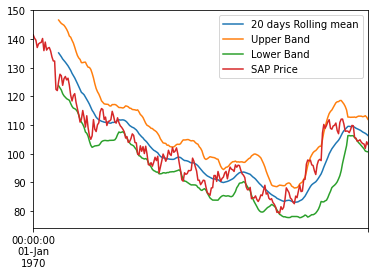

In [62]:
# Bollinger

#sap = data.DataReader("SAP", "yahoo", "2019-01-01", "2020-08-31")

sap = pd.read_csv('./data/SAP.csv')
sap.index = pd.to_datetime(sap.index)

boll = sap["Close"].rolling(window=20, center=False).mean()
std = sap["Close"].rolling(window=20, center=False).std()

upp = boll + std * 2
low = boll - std * 2

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

boll.plot(ax=ax, label="20 days Rolling mean")
upp.plot(ax=ax, label="Upper Band")
low.plot(ax=ax, label="Lower Band")

sap["Close"].plot(ax=ax, label="SAP Price")

ax.legend(loc="best")

fig.savefig("data/boll.pdf")

In [63]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

Author: Caique Miranda

Github username: caiquemiranda

sys              : 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]
pandas_datareader: 0.10.0
pandas           : 1.4.3
requests         : 2.28.1
numpy            : 1.23.0
matplotlib       : 3.5.2



### END.